In [40]:
import os
import urllib
import pandas as ps
import matplotlib.pyplot as plt
plt.style.use('seaborn')

def get_fermont_data(filename, url, force_download=False):
    if force_download or not os.path.exists(filename):
        urllib.urlretrieve(url, filename)
    data = pd.read_csv(filename, index_col="Date", parse_dates=True)
    data.columns = ['West','East']
    data['Total'] = data['West'] + data ['East']
    return data

In [39]:
url = "https://data.seattle.gov/api/views/mdbt-9ykn/rows.csv?access\
       Type=DOWNLOAD"
URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?access\
       Type=DOWNLOAD" 

data = get_fermont_data(filename="Fremont.csv", url = URL, force_download=True)

In [26]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


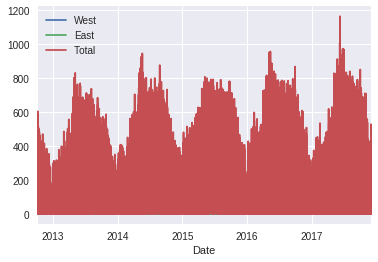

In [27]:
%matplotlib inline
data.plot();

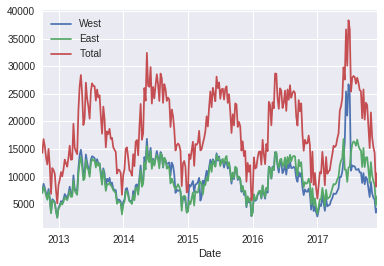

In [28]:
data.resample('W').sum().plot();

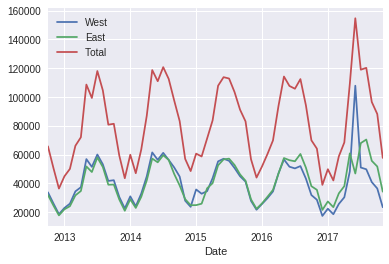

In [29]:
data.resample('M').sum().plot();

/home/alaa/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  This is separate from the ipykernel package so we can avoid doing imports until


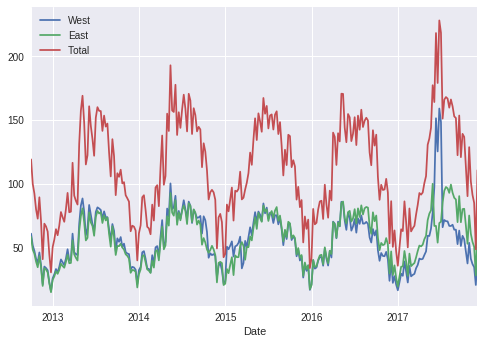

In [31]:
data.resample('W').plot();

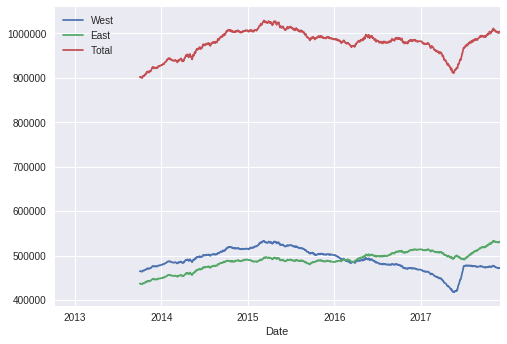

In [32]:
# the annual trend of data is calculated by resampling the data daily over
# each year, 
# so we could calculate the summation of data points of each day each year
data.resample('D').sum().rolling(365).sum().plot();

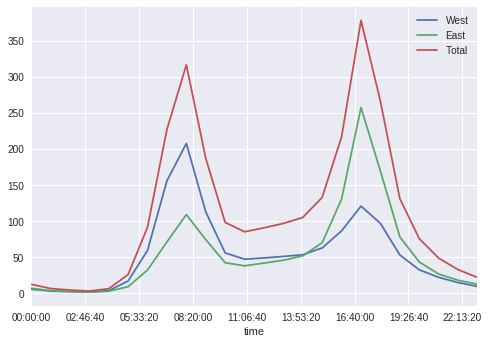

In [33]:
data.groupby(data.index.time).mean().plot();

In [34]:
pivoted = data.pivot_table('Total', index=data.index.time,
                           columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


In [35]:
print(pivoted.shape)

(24, 1885)


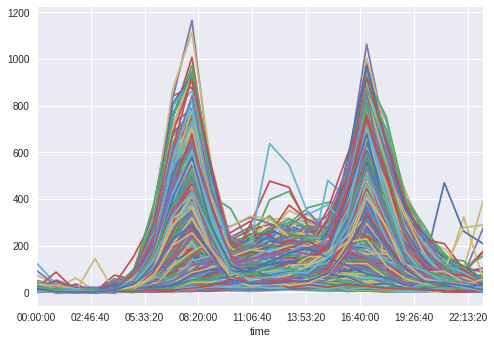

In [36]:
# a ine for each day in each year
pivoted.plot(legend=False)

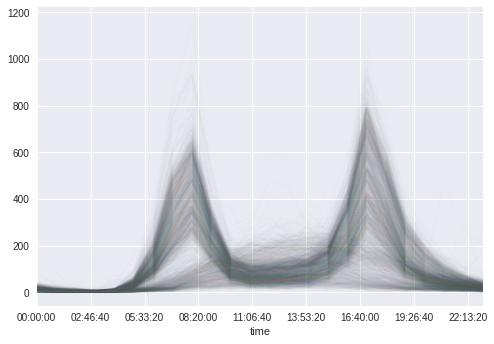

In [37]:
pivoted.plot(legend=False, alpha=0.01)